In [1]:
# general and data handling
import numpy as np
import pandas as pd
import os

from collections import Counter

In [2]:
#current directory
os

<module 'os' from 'C:\\Users\\Admin\\anaconda3\\envs\\my-rdkit-env\\lib\\os.py'>

In [3]:
# Required RDKit modules
import rdkit as rd
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import RDConfig
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem import AllChem 
from rdkit.Chem.rdMolDescriptors import GetAtomPairFingerprint
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdmolops
from rdkit.Chem import rdMolDescriptors

In [4]:
# modeling
import sklearn as sk
from sklearn import metrics

In [5]:
# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading sdfFile
sdfFile = os.path.join(RDConfig.RDDataDir, 'C:\\Users\\ADMIN\\Desktop\\structures.molV3.sdf')

In [7]:
#adding columns to pandas
dframe = PandasTools.LoadSDF(sdfFile,smilesName='SMILES',molColName='Molecule', includeFingerprints=True)

,ID,PREFERRED_NAME,CAS_RN,SYNONYMS,URL,SMILES,Molecule,type,CAS,Name,Ambiguous
0,levobupivacaine,levobupivacaine,27262-47-1,levobupivacaine\nchirocain\nlevobupivacaine hy...,http://drugcentral.org/drugcard/4/view,CCCCN1CCCC[C@H]1C(=O)Nc1c(C)cccc1C,,NaN,NaN,NaN,NaN
1,(S)-nicardipine,(S)-nicardipine,76093-36-2,(S)-nicardipine\n(-)-Nicardipine,http://drugcentral.org/drugcard/5/view,COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)[C...,,NaN,NaN,NaN,NaN
2,(S)-nitrendipine,(S)-nitrendipine,80873-62-7,(S)-nitrendipine\n(-)-Nitrendipine,http://drugcentral.org/drugcard/6/view,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OC)[C@@H]1c1cccc([...,,NaN,NaN,NaN,NaN
3,levdobutamine,levdobutamine,61661-06-1,levdobutamine\nlevdobutamine lactobionate\nLY2...,http://drugcentral.org/drugcard/13/view,C[C@@H](CCc1ccc(O)cc1)NCCc1ccc(O)c(O)c1,,NaN,NaN,NaN,NaN
4,aminopterin,aminopterin,54-62-6,"4-aminofolic acid\nAminofolic acid, 4-\naminop...",http://drugcentral.org/drugcard/21/view,Nc1nc(N)c2nc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=...,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4637,eptinezumab,eptinezumab,1644539-04-7,eptinezumab\neptinezumab-jjmr\nvyepti\nALD403,http://drugcentral.org/drugcard/5386/view,,,NaN,NaN,NaN,NaN
4638,teprotumumab,teprotumumab,1036734-93-6,teprotumumab\nteprotumumab-trbw\ntepezza\nRO48...,http://drugcentral.org/drugcard/5387/view,,,NaN,NaN,NaN,NaN
4639,selumetinib,selumetinib,606143-52-6,selumetinib\nselumetinib sulfate\nkoselugo\nAZ...,http://drugcentral.org/drugcard/5388/view,Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21,,NaN,NaN,NaN,NaN
4640,tucatinib,tucatinib,937263-43-9,tucatinib\ntukysa\nARRY-380\nONT-380,http://drugcentral.org/drugcard/5389/view,Cc1cc(Nc2ncnc3ccc(NC4=NC(C)(C)CO4)cc23)ccc1Oc1...,,NaN,NaN,NaN,NaN

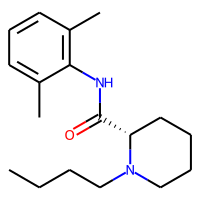
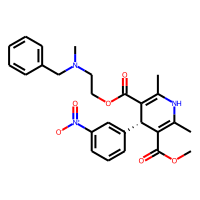
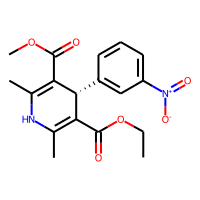
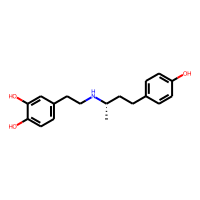
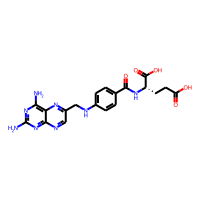
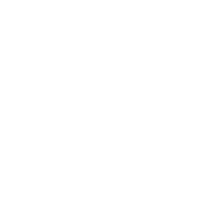
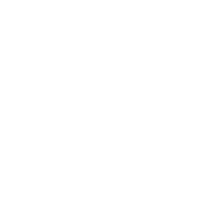
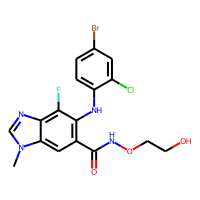
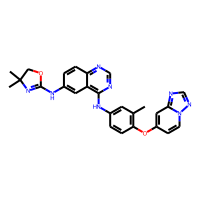
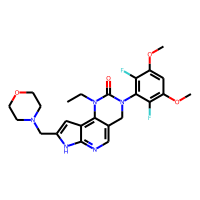

In [8]:
#table content
dframe

In [9]:
#table columns
dframe.columns

Index(['ID', 'PREFERRED_NAME', 'CAS_RN', 'SYNONYMS', 'URL', 'SMILES',
       'Molecule', 'type', 'CAS', 'Name', 'Ambiguous'],
      dtype='object')

In [10]:
# drop columns from pandas 
data=dframe.drop(['ID', 'PREFERRED_NAME', 'CAS_RN', 'SYNONYMS', 'URL','Molecule', 'type', 'CAS', 'Name', 'Ambiguous'],axis=1)

In [11]:
#reading mol from smiles
data["mol"] = [Chem.MolFromSmiles(x) for x in dframe["SMILES"]]

In [12]:
#count the nummber of unique rows in the SMILES column
data['SMILES'].nunique()

4361

In [13]:
#Compare that with total rows
data['SMILES'].count()

4607

,SMILES,mol
0,CCCCN1CCCC[C@H]1C(=O)Nc1c(C)cccc1C,
1,COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)[C...,
2,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OC)[C@@H]1c1cccc([...,
3,C[C@@H](CCc1ccc(O)cc1)NCCc1ccc(O)c(O)c1,
4,Nc1nc(N)c2nc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=...,
...,...,...
4634,CC(C)Oc1ccc(-c2nc(-c3cccc4c3CC[C@@H]4NCCO)no2)...,
4635,N#Cc1ccc([C@H]2CCc3cncn32)c(F)c1,
4639,Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21,
4640,Cc1cc(Nc2ncnc3ccc(NC4=NC(C)(C)CO4)cc23)ccc1Oc1...,

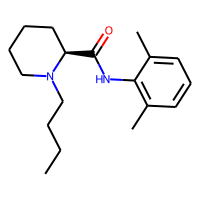
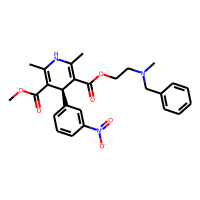
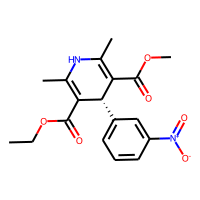
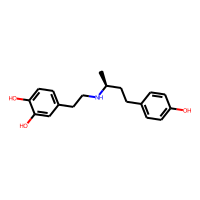
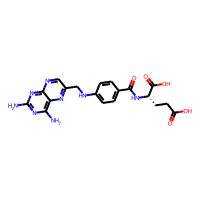
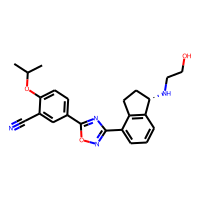
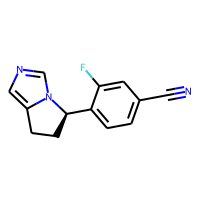
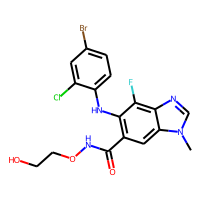
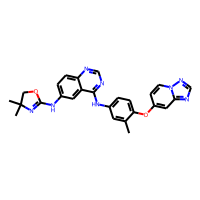
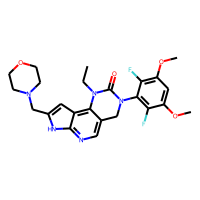

In [14]:
#we can drop the duplicated ones
data=data.drop_duplicates(['SMILES'])
display(data)

In [15]:
#atompair fingerprint(Generate BitVect fingerprints)
MinLength=1
MaxLength=7
FPSize = 2048
BitsPerHash = 2       
data["atom_fp"] = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(x, minLength = MinLength, maxLength = MaxLength, includeChirality = True, nBits = FPSize, nBitsPerEntry = BitsPerHash) for x in data['mol']]

In [16]:
data["atom_fp"] 

0       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...
1       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...
2       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...
3       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...
                              ...                        
4634    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...
4635    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4639    [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...
4640    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4641    [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...
Name: atom_fp, Length: 4361, dtype: object

In [17]:
atom_fp = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(x, minLength = MinLength, maxLength = MaxLength, includeChirality = True) for x in data['mol']]

In [18]:
atom_fp

 ...]

In [19]:
len(atom_fp[1])

2048

In [20]:
print(atom_fp[1].GetNumBits())
print(atom_fp[1].GetNumOffBits())
print(atom_fp[1].GetNumOnBits())
print(atom_fp[1].ToBinary())

2048
1772
276
b'\xe0\xff\xff\xff\x00\x08\x00\x00\x14\x01\x00\x00\x00\x00\x00\x02\x00\x00\x12\x00\x002\x00\x00"\x00\x00\x02\x00\x00:\x06\x0e\x06\x00\x00*>\x00<\x00$\x0e\x00\x00\x12\x00\x00\x12\x00\x00\x02\x00\x00\n\x1e\x00\x04\x0e\x00\x00\x12\x16\x00\x00\x02\x00\x00\x12\x1e\x16\x16\x00\x1c.V\x00\x04\x00\x002\x00\x04\x00\x00\x02\x1e\x1e\x00\x04\x00\x00\x12\x00\x00\x00\x00\x1e.\x00\x00\x02\x00\x0c\x00\x00*\x06\x06\x00L\x00D\x00\x00\x12\x00\x00\n6\x00\x04\x00\x00\x00\x00\x00\x00\x12\x06\x00\x14\x00\x00\x02\x00\x00\x02\x16\x06\x06\x1e\x00\x04\x16\x00\x00\x02\x00\x0c\x00\x0c\x00\x0c\x00\x04\x00\x04\x06\x0e\x00t\x06\x00\x04\x00\x14>\x00\x00\x00\x00\x00\x00"\x06\x06\x00\x04\x00\x04\x00,\x00\x00\x02.\x00\x04\x00<\x00\x04>\x004\x0e\x00\x002\x00\x00\x02\x00\x00\x1a>\x00\x00\x02.\x06\x00\x00\n\x06&\x00\x04\x00\x14\x00\x1c\x00d\x00\x14&&\x00\x00\x00\x10\x00\x00Z\x00\x00\x026\x00\x04\x00\x00\x12&\x1e\x96\x00\x04\x00$\x00<6\x00\x00\x02\x00\x00\n\x00\x00\n\x16>\x00\x04\x00,\x06\x06\x06\x00\x00R\x00\x0

In [21]:
# convert the RDKit explicit vectors into numpy arrays
atom_fp_np = []
for fp in atom_fp:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  atom_fp_np.append(arr)

In [22]:
#tanimota similarity for atompair fingerprint
data['atom_tanimoto'] = DataStructs.BulkTanimotoSimilarity(atom_fp[0], atom_fp)
data['atom_tanimoto']

0       1.000000
1       0.274924
2       0.228188
3       0.271429
4       0.233677
          ...   
4634    0.262976
4635    0.183857
4639    0.220000
4640    0.161905
4641    0.273556
Name: atom_tanimoto, Length: 4361, dtype: float64

C:\Users\Admin\anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


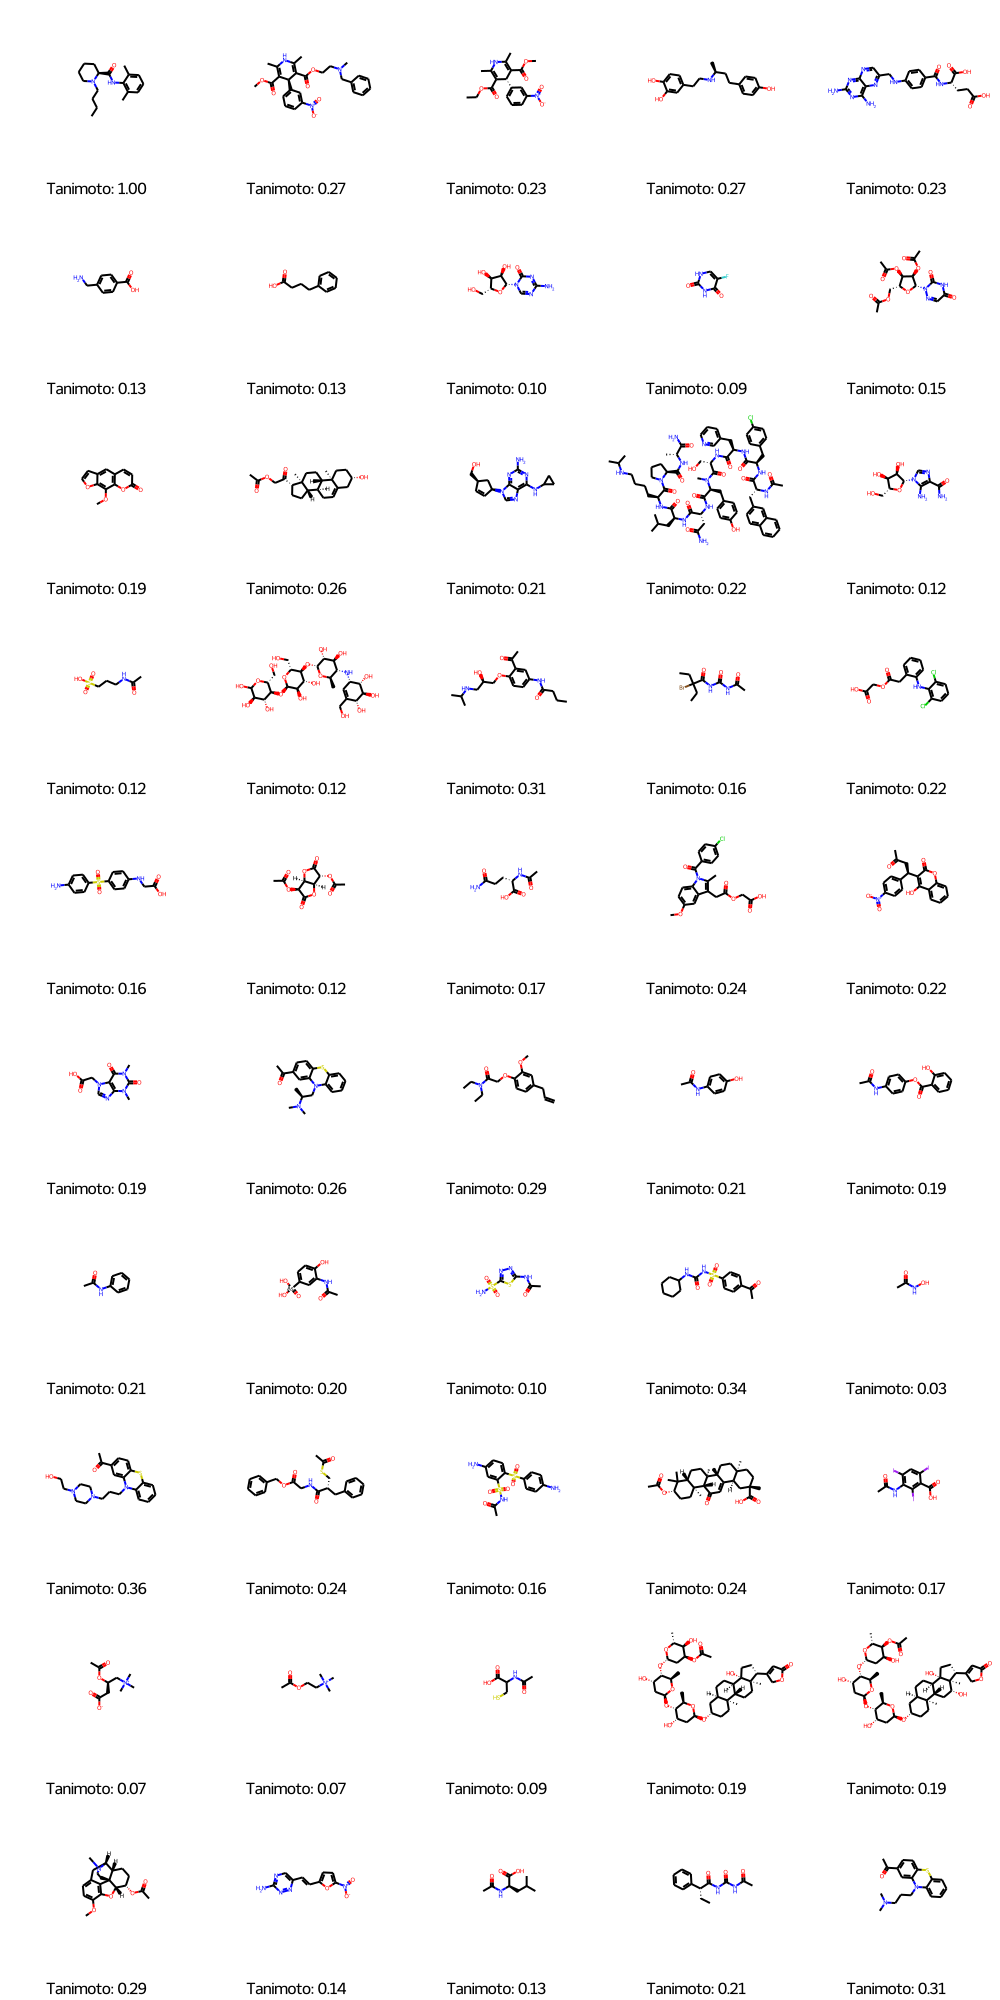

In [23]:
#drawing molstructure for tanimoto values
Draw.MolsToGridImage(data["mol"], molsPerRow=5, subImgSize=(200,200), legends=['Tanimoto: {:.2f}'.format(i) for i in data['atom_tanimoto']])

In [24]:
#MACCSKEY
data["mac_fp"]=[rdMolDescriptors.GetMACCSKeysFingerprint(x) for x in data['mol']]

In [25]:
data["mac_fp"]

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4634    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4635    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4639    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4640    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4641    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: mac_fp, Length: 4361, dtype: object

In [26]:
mac_fp =[rdMolDescriptors.GetMACCSKeysFingerprint(x) for x in data['mol']]

In [27]:
mac_fp

 ...]

In [28]:
len(mac_fp[1])

167

In [29]:
print(mac_fp[1].GetNumBits())
print(mac_fp[1].GetNumOffBits())
print(mac_fp[1].GetNumOnBits())
print(mac_fp[1].ToBinary())

167
104
63
b'\xe0\xff\xff\xff\xa7\x00\x00\x00?\x00\x00\x000(\x06\x00\n\n\x00\x0c\x00\x08\x10\x00\x0c\x00\x00\x02\x00\x00\x00\x02\x0c\x02\x06\x00\x02\x00\x02\x00\x00\x00\x00\x00\x04\x00\x02\x00\x02\x00\x00\x00\x02\x00\x00\x04\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02'


In [30]:
# convert the RDKit explicit vectors into numpy arrays
mac_fp_np = []
for fp in mac_fp:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  mac_fp_np.append(arr)

In [31]:
#tanimota similarity for maccskey fingerprint
data['mac_tanimoto'] = DataStructs.BulkTanimotoSimilarity(mac_fp[0], mac_fp)
data['mac_tanimoto'] 

0       1.000000
1       0.479452
2       0.352113
3       0.400000
4       0.420290
          ...   
4634    0.423077
4635    0.305085
4639    0.412500
4640    0.407895
4641    0.525641
Name: mac_tanimoto, Length: 4361, dtype: float64

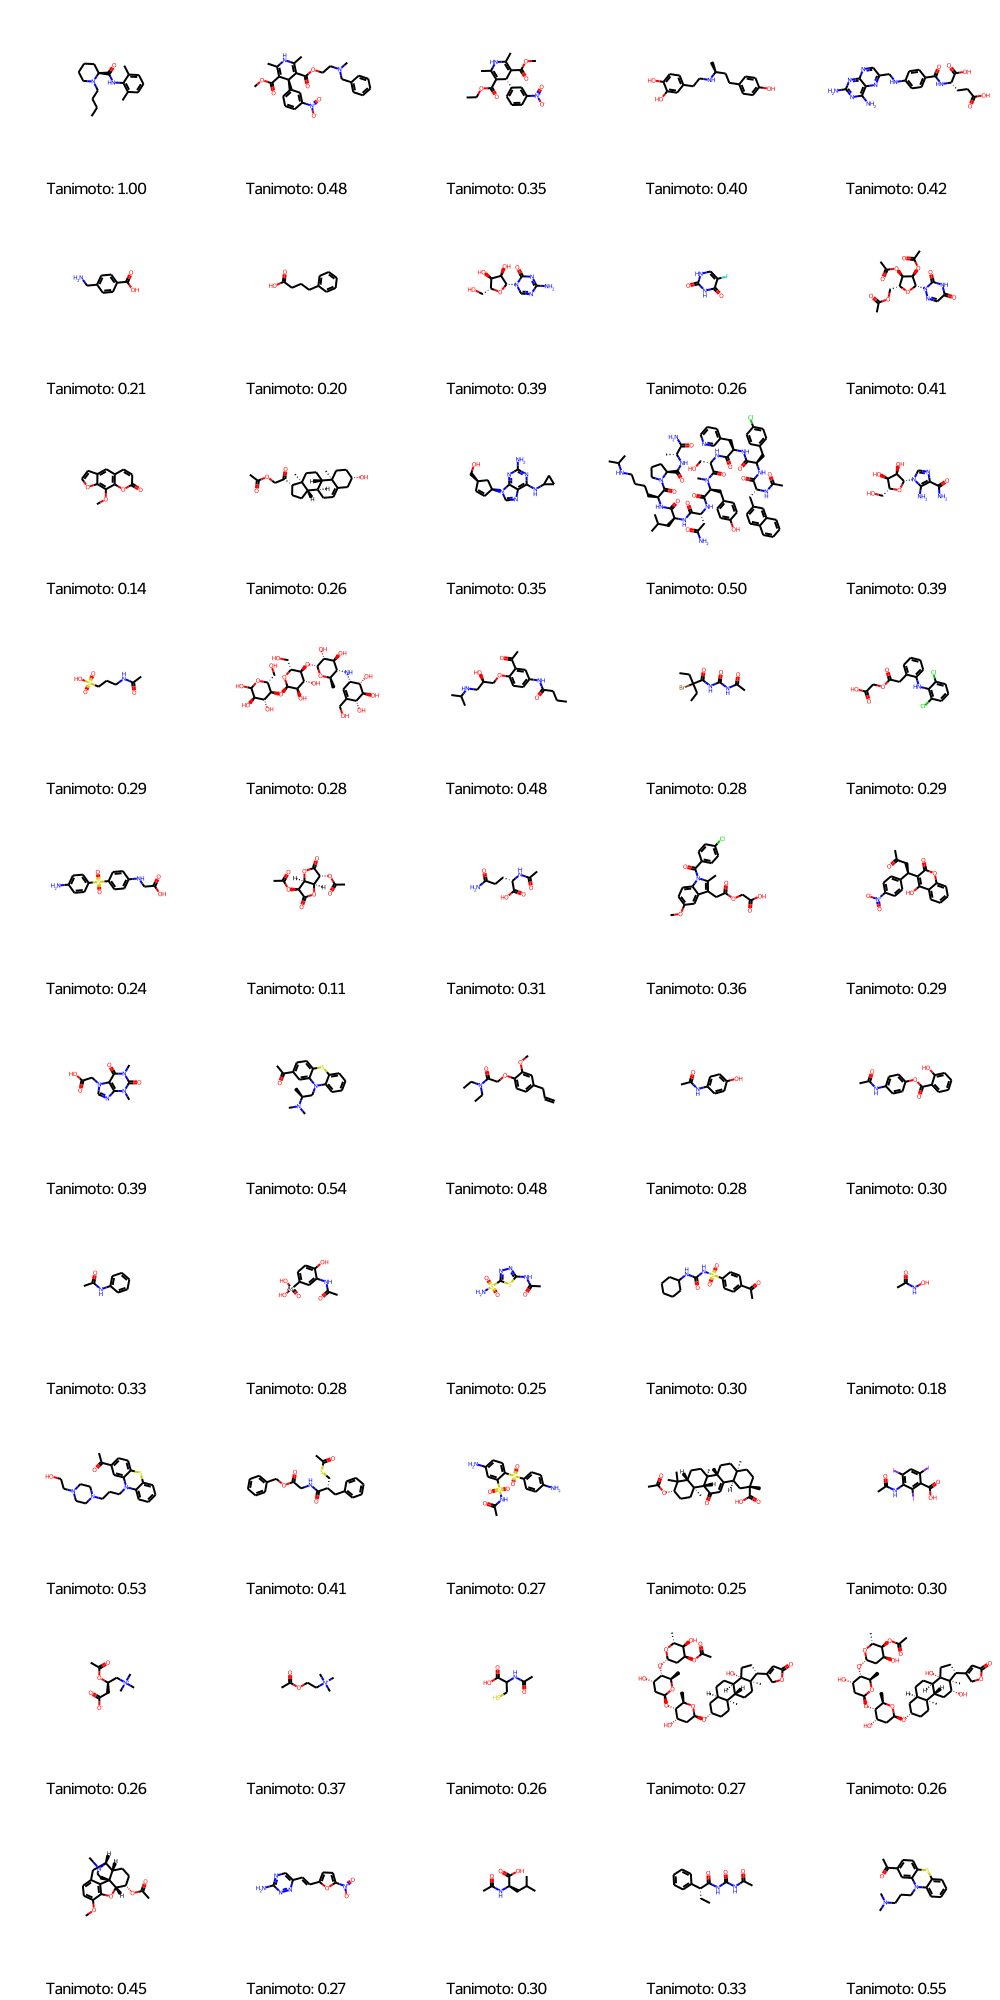

In [32]:
#from maccskey tanimoto values
Draw.MolsToGridImage(data["mol"], molsPerRow=5, subImgSize=(200,200), legends=['Tanimoto: {:.2f}'.format(i) for i in data['mac_tanimoto']])

In [33]:
#Morgan fingerprint
#create a "morg_fp" column
data["morg_fp"] = [AllChem.GetMorganFingerprintAsBitVect(x, 2,  nBits = 2048) for x in data['mol']]

In [34]:
data["morg_fp"]

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4634    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4635    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4639    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
4640    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4641    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: morg_fp, Length: 4361, dtype: object

In [35]:
# generate morgan fingeprints with radius 2 contained in a list
morg_fp = [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits = 2048) for x in data['mol']]

In [36]:
morg_fp

 ...]

In [37]:
len(morg_fp[1])

2048

In [38]:
print(morg_fp[1].GetNumBits())
print(morg_fp[1].GetNumOffBits())
print(morg_fp[1].GetNumOnBits())
print(morg_fp[1].ToBinary())

2048
1990
58
b'\xe0\xff\xff\xff\x00\x08\x00\x00:\x00\x00\x00\x1a\x84\x80\x02\xc5\x01\xea)\x00\x06X&Jj<\x04:\x06\x04\x040\xc4\x1a \x04"\x04\n*2@\x08\x14\x06\x06.\x06HJ\x08Rt\xa6V\xa6"P\x16\x08\n^6\x06l~V,\x14\x16^H'


In [39]:
# convert the RDKit explicit vectors into numpy arrays
morg_fp_np = []
for fp in morg_fp:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  morg_fp_np.append(arr)

In [40]:
morg_fp_np

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [41]:
#tanimota similarity for morgan fingerprint
data['morg_tanimoto'] = DataStructs.BulkTanimotoSimilarity(morg_fp[0], morg_fp)
data['morg_tanimoto'] 

0       1.000000
1       0.151163
2       0.194444
3       0.102941
4       0.090909
          ...   
4634    0.141304
4635    0.109589
4639    0.136364
4640    0.117021
4641    0.107527
Name: morg_tanimoto, Length: 4361, dtype: float64

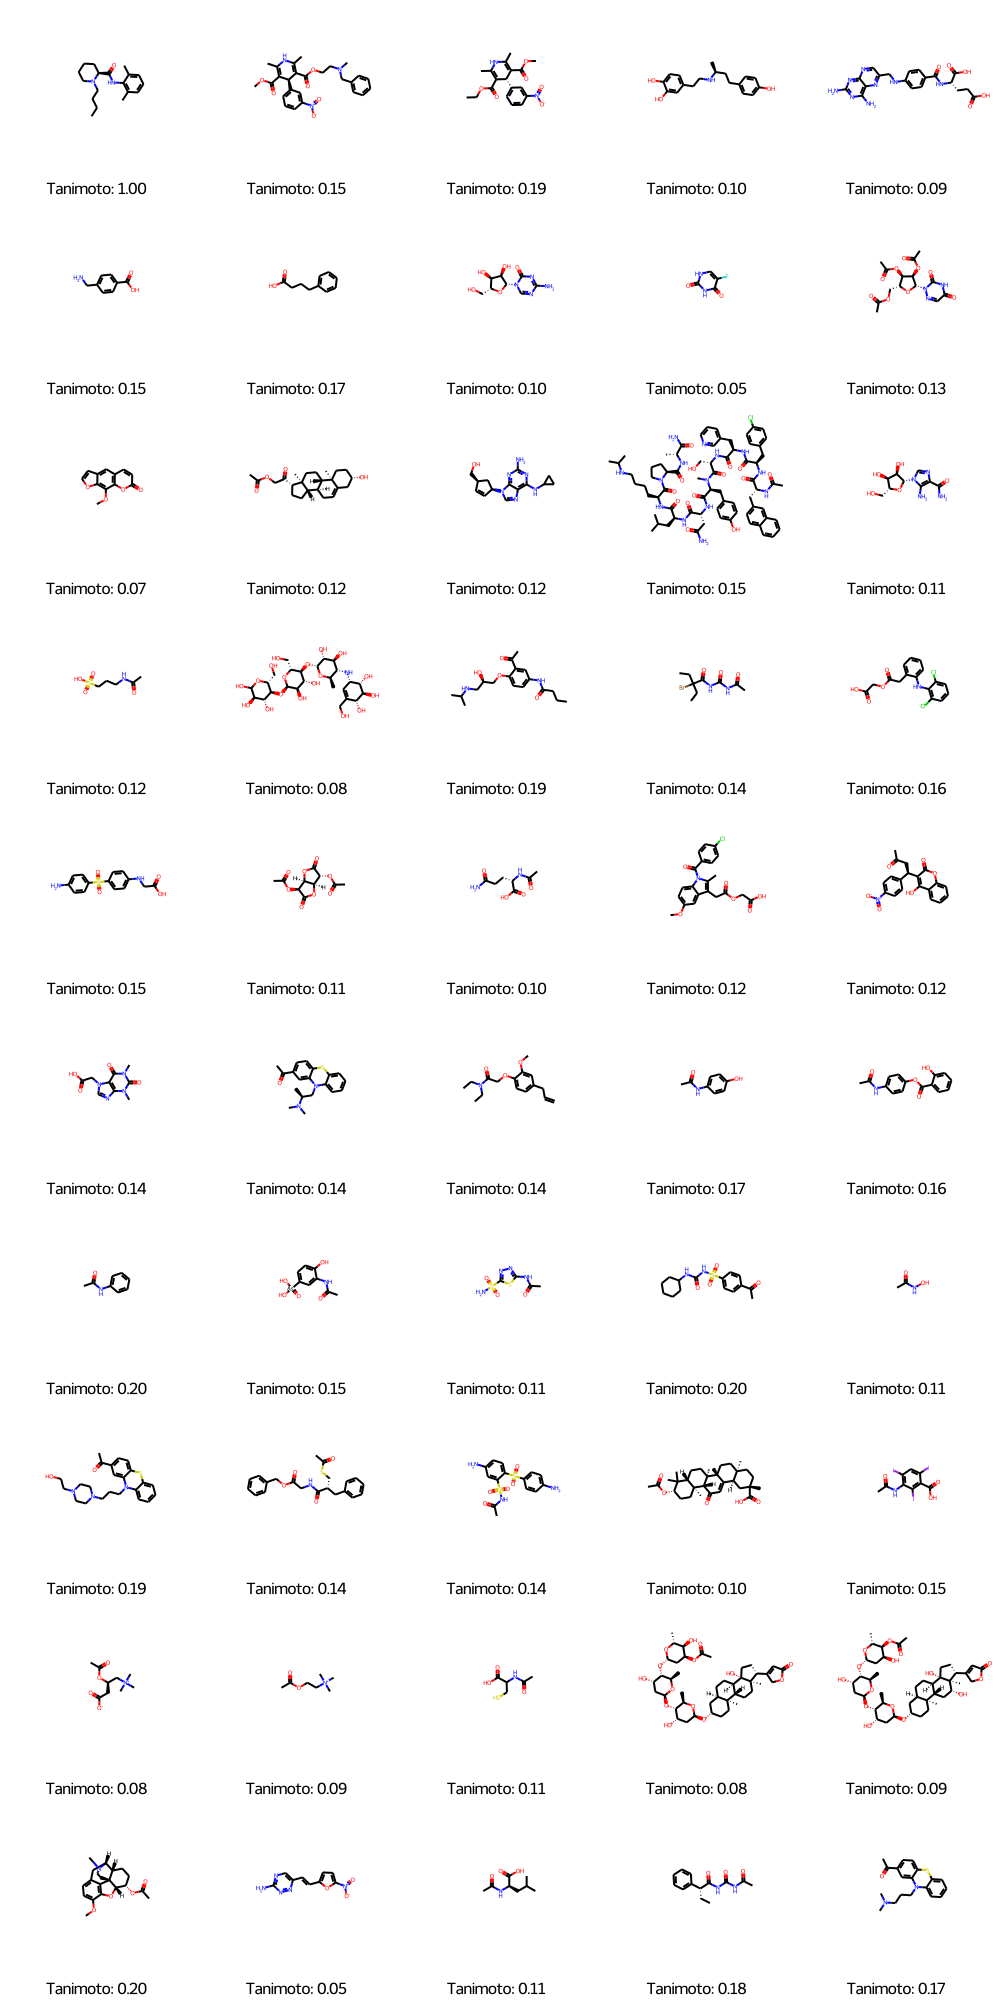

In [42]:
# drawing images from morgan tanimoto values
Draw.MolsToGridImage(data["mol"], molsPerRow=5, subImgSize=(200,200), legends=['Tanimoto: {:.2f}'.format(i) for i in data['morg_tanimoto']])

In [43]:
#pathlength or daylight fingerprint
data['palen_fp'] = [FingerprintMols.FingerprintMol(x, minPath=1, maxPath=7, fpSize=2048, bitsPerHash=2, useHs=True, tgtDensity=0.0,
                               minSize=64 ) for x in data['mol']]

In [44]:
data['palen_fp']

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
1       [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...
2       [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...
4       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...
                              ...                        
4634    [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...
4635    [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...
4639    [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, ...
4640    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...
4641    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...
Name: palen_fp, Length: 4361, dtype: object

In [45]:
palen_fp =  [FingerprintMols.FingerprintMol(x, minPath=1, maxPath=7, fpSize=2048, bitsPerHash=2, useHs=True, tgtDensity=0.0, minSize=64,) for x in data['mol']]

In [46]:
palen_fp

 ...]

In [47]:
len(palen_fp[1])

2048

In [48]:
print(palen_fp[1].GetNumBits())
print(palen_fp[1].GetNumOffBits())
print(palen_fp[1].GetNumOnBits())
print(palen_fp[1].ToBinary())

2048
967
1081
b'\xe0\xff\xff\xff\x00\x08\x00\x009\x04\x00\x00\x04\x00\x00\x04\x00\x00\x00\x08\x02\x02\x04\x00\x00\x08\x02\x06\x02\x00\x00\x02\x00\x06\x00\x06\x06\x00\x04\x00\x00\x02\x00\x00\x08\x00\x00\x00\x02\x00\x02\x08\x04\x00\x08\x08\x00\x00\x02\x02\x00\x04\x00\x00\x04\x06\x06\x00\x00\x00\x00\x02\x00\x06\x00\x00\x00\x04\x02\x06\x02\x02\x00\x04\x08\x00\x00\x00\x02\x00\x00\x04\x00\x00\x00\x02\x00\x00\x02\x04\x02\x00\x08\x06\x00\x04\x02\x00\x00\x02\x00\x00\x02\x00\x0e\x08\x00\x00\x00\x02\x08\x04\x00\x00\x00\x00\x02\x04\x00\x06\x00\x04\x00\x02\x00\x00\x00\x00\x00\x04\x00\x06\x00\x00\x00\x00\x02\x00\x02\x02\x00\x00\x00\x00\x02\x00\x00\x02\x02\x00\x02\x00\x02\x00\x00\x00\x00\x08\x02\x00\x02\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x02\x00\x06\x02\x00\x0c\x00\x04\x00\x00\x00\x06\x02\x02\x02\x00\x00\x06\x02\x00\x02\x00\x00\x00\x00\x00\x02\x02\x00\x02\x02\x00\x00\x00\x04\x00\x06\x06\x00\x02\x02\x00\x00\x00\x04\x00\x00\x00\x04\x04\x02\x06\x00\x00\x02\x00\x02\x02\x04\x00\x00\x0

In [49]:
# convert the RDKit explicit vectors into numpy arrays
palen_fp_np = []
for fp in palen_fp:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  palen_fp_np.append(arr)

In [50]:
palen_fp_np

[array([0., 0., 0., ..., 0., 0., 1.]),
 array([0., 0., 1., ..., 1., 0., 1.]),
 array([0., 0., 1., ..., 1., 0., 1.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([1., 1., 0., ..., 0., 0., 1.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 1., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 0., 1.]),
 array([1., 0., 1., ..., 1., 1., 0.]),
 array([0., 1., 0., ..., 1., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 1.]),
 array([1., 1., 1., ..., 0., 1., 1.]),
 array([1., 0., 1., ..., 1., 1., 1.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([1., 0., 1., ..., 0., 0., 1.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([0., 1., 0., ..., 0., 1., 1.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([1., 0., 1., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 1., 0., ..., 1., 1., 1.]),
 array([1., 1., 0., ..., 

In [51]:
#tanimota similarity for path_based fingerprint
data['palen_tanimoto'] = DataStructs.BulkTanimotoSimilarity(palen_fp[0], palen_fp)
data['palen_tanimoto']

0       1.000000
1       0.260263
2       0.253635
3       0.191549
4       0.276248
          ...   
4634    0.237251
4635    0.210938
4639    0.258746
4640    0.254902
4641    0.277247
Name: palen_tanimoto, Length: 4361, dtype: float64

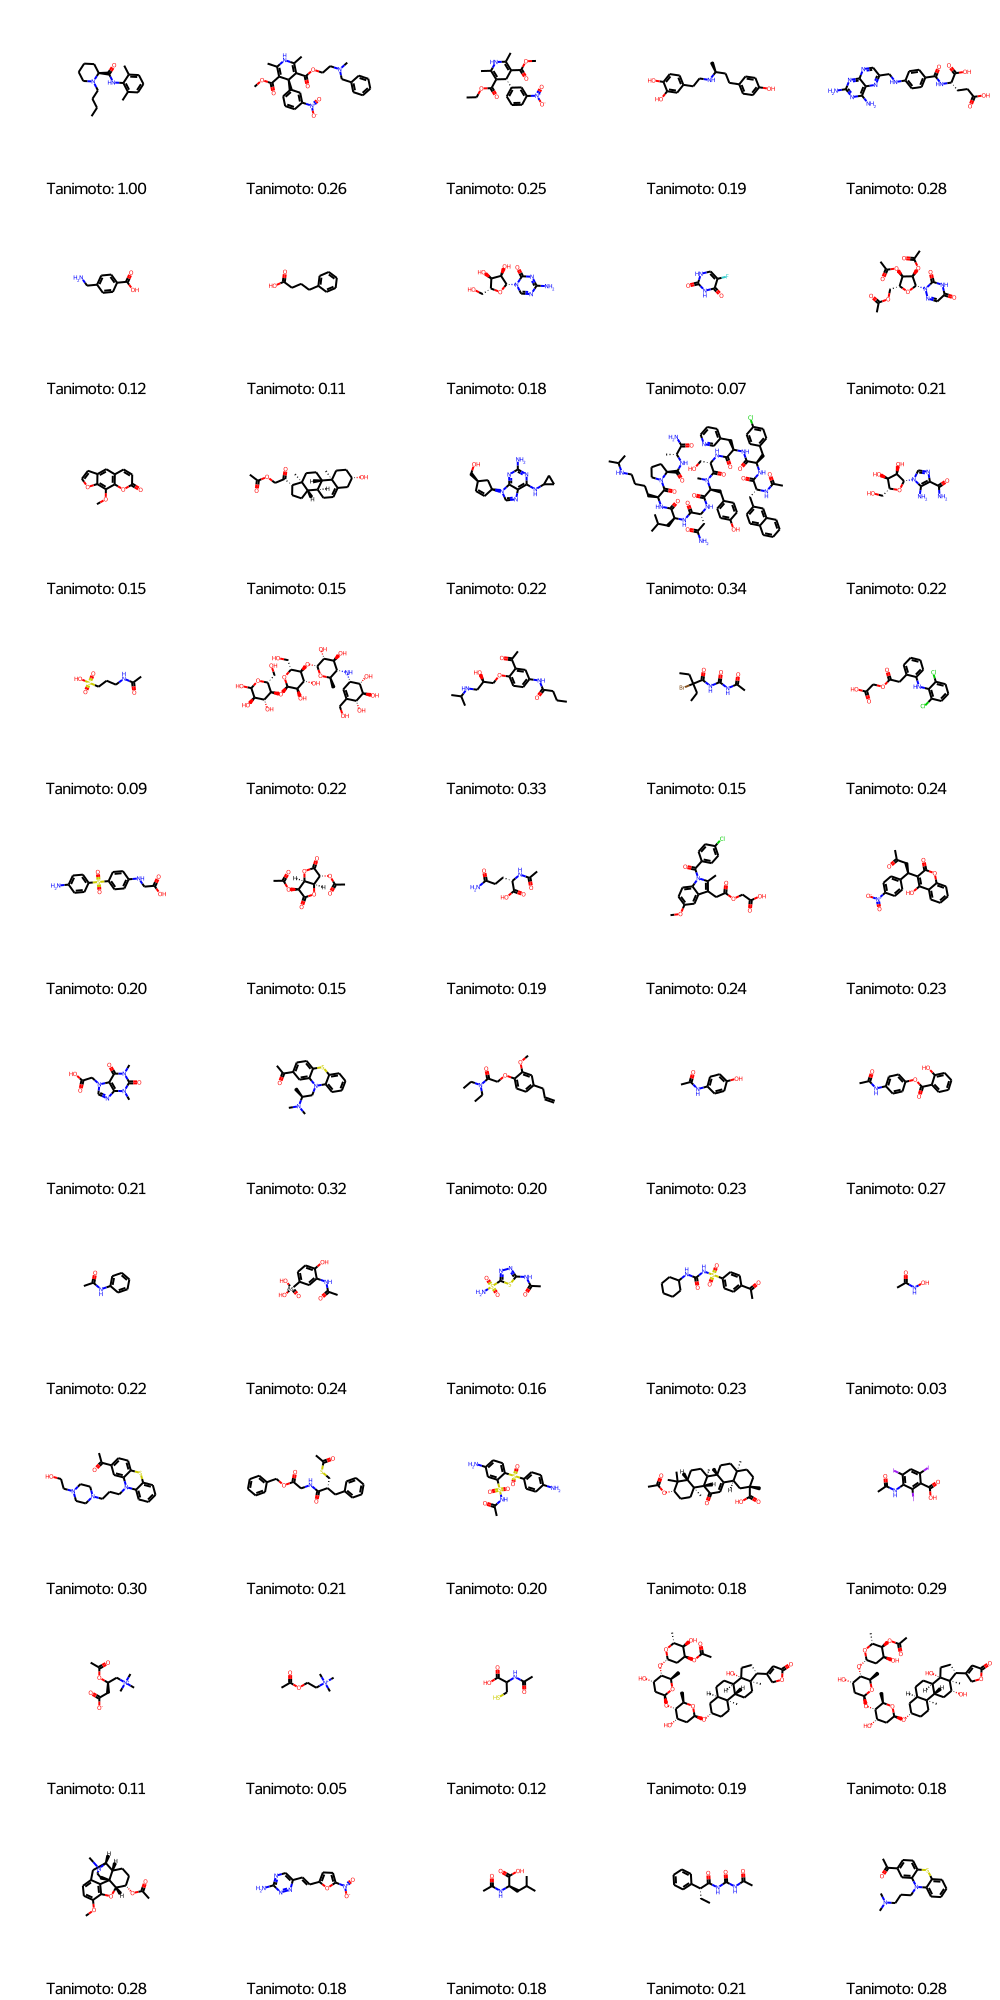

In [52]:
#drawing molstructure for tanimoto values
Draw.MolsToGridImage(data["mol"], molsPerRow=5, subImgSize=(200,200), legends=['Tanimoto: {:.2f}'.format(i) for i in data['palen_tanimoto']])

In [53]:
#Topological fingerprint
FPSize = 2048
BitsPerHash = 4 
data["toptor_fp"] = [rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(x,  includeChirality = True, nBits = FPSize, nBitsPerEntry = BitsPerHash) for x in data['mol']]

In [54]:
data["toptor_fp"]

0       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4634    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4635    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4639    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4640    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4641    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: toptor_fp, Length: 4361, dtype: object

In [55]:
toptor_fp = [rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(x,  includeChirality = True, nBits = FPSize, nBitsPerEntry = BitsPerHash) for x in data['mol']]

In [56]:
toptor_fp

 ...]

In [57]:
len(toptor_fp[1])

2048

In [58]:
print(toptor_fp[1].GetNumBits())
print(toptor_fp[1].GetNumOffBits())
print(toptor_fp[1].GetNumOnBits())
print(toptor_fp[1].ToBinary())

2048
1989
59
b'\xe0\xff\xff\xff\x00\x08\x00\x00;\x00\x00\x00\x18\x00D\x00\x00B\x00\t\x01\xc6\x00\x00b>\x00$\x00\x14\x00\x0cN\x00T6\x1ef^\x00\x002\xde\x00\x0c&\xde\x00Y\x00V\xa6.\x00\t\x00\x00\x00\x00\xa0\x00\x9c\x00,\x00\x0c\x00\x0c\x00\x04\x00\x19\x00\x06\x00\xe9\x01'


In [59]:
# convert the RDKit explicit vectors into numpy arrays
toptor_fp_np = []
for fp in toptor_fp:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  toptor_fp_np.append(arr)

In [60]:
toptor_fp_np

[array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [61]:
#tanimota similarity for topological fingerprint
data['toptor_tanimoto'] = DataStructs.BulkTanimotoSimilarity(toptor_fp[0], toptor_fp)
data['toptor_tanimoto']

0       1.000000
1       0.119048
2       0.109589
3       0.050847
4       0.093333
          ...   
4634    0.104651
4635    0.042857
4639    0.118421
4640    0.082474
4641    0.068627
Name: toptor_tanimoto, Length: 4361, dtype: float64

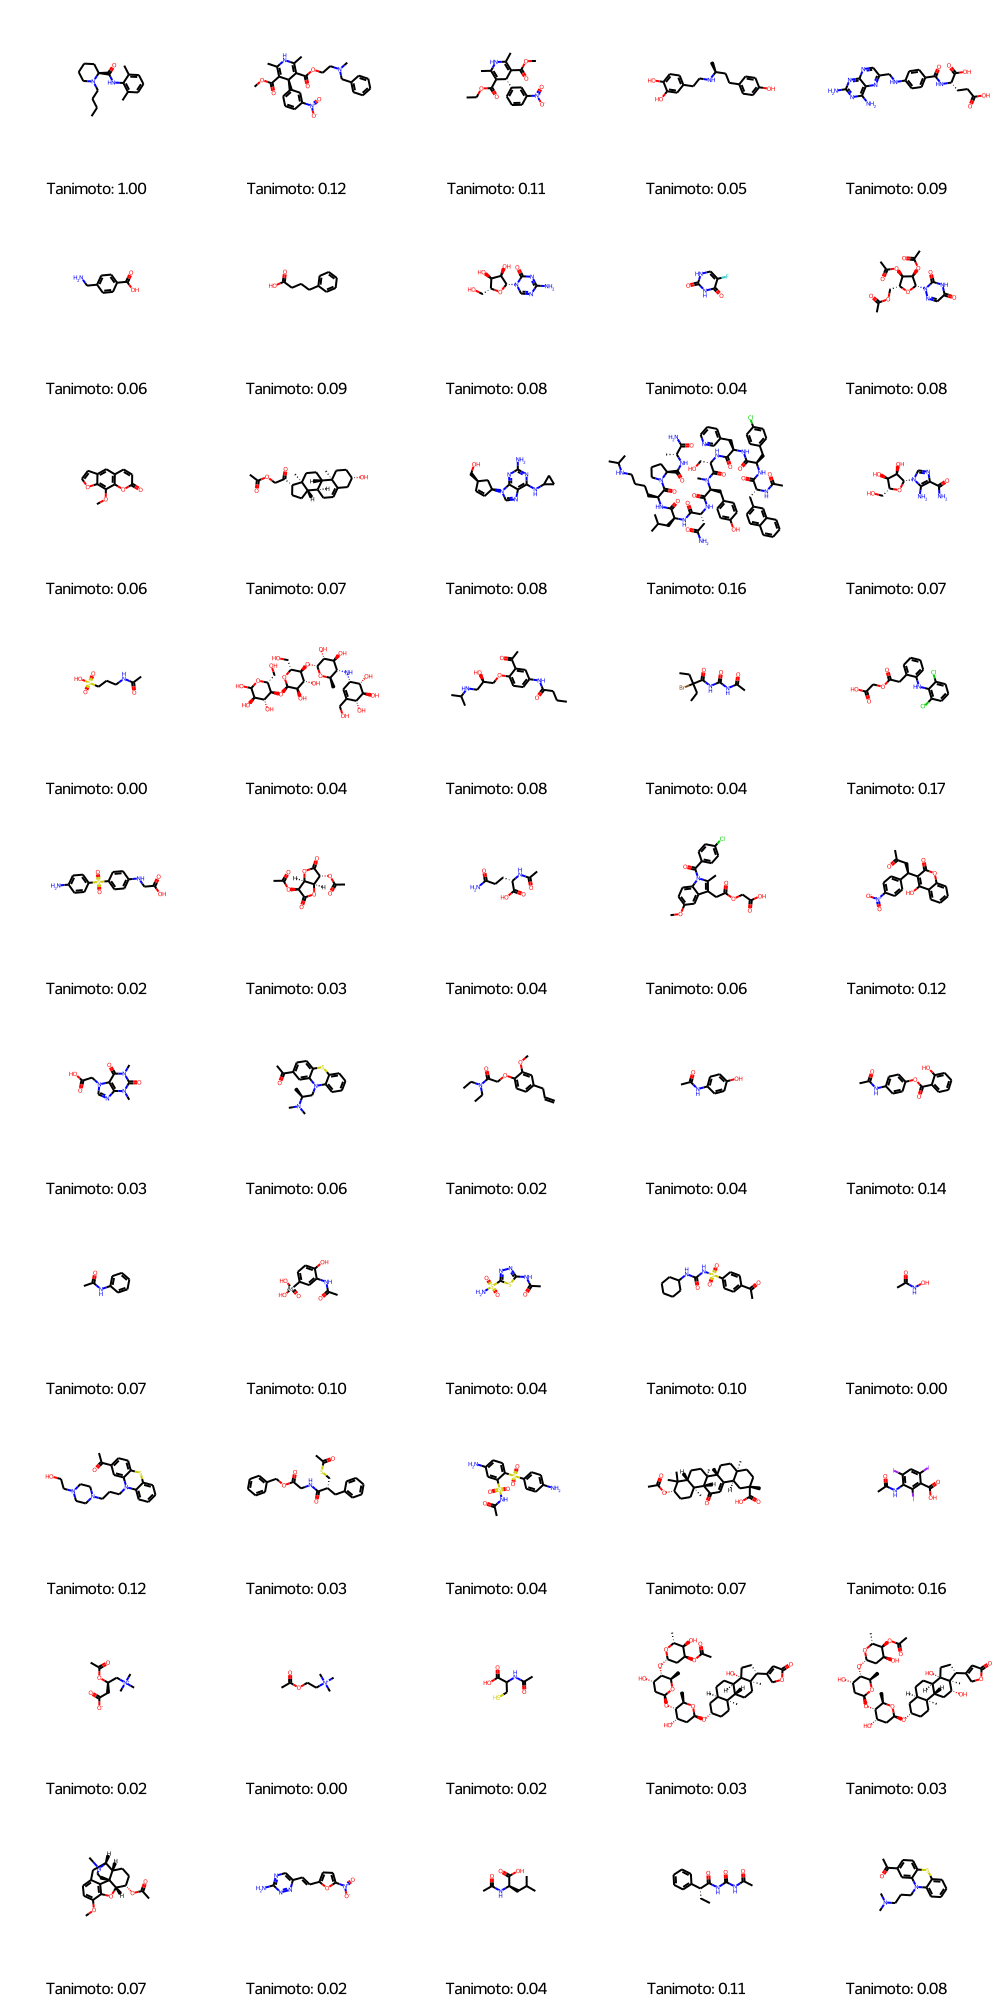

In [62]:
#drawing molstructure for tanimoto values
Draw.MolsToGridImage(data["mol"], molsPerRow=5, subImgSize=(200,200), legends=['Tanimoto: {:.2f}'.format(i) for i in data['toptor_tanimoto']])

,SMILES,mol,atom_fp,atom_tanimoto,mac_fp,mac_tanimoto,morg_fp,morg_tanimoto,palen_fp,palen_tanimoto,toptor_fp,toptor_tanimoto
0,CCCCN1CCCC[C@H]1C(=O)Nc1c(C)cccc1C,,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",1.000000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
1,COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)[C...,,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.274924,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479452,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.151163,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...",0.260263,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",0.119048
2,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OC)[C@@H]1c1cccc([...,,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.228188,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.352113,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.194444,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...",0.253635,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.109589
3,C[C@@H](CCc1ccc(O)cc1)NCCc1ccc(O)c(O)c1,,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.271429,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.400000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.102941,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",0.191549,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.050847
4,Nc1nc(N)c2nc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(=...,,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.233677,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.420290,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090909,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...",0.276248,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.093333
...,...,...,...,...,...,...,...,...,...,...,...,...
4634,CC(C)Oc1ccc(-c2nc(-c3cccc4c3CC[C@@H]4NCCO)no2)...,,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...",0.262976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.423077,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.141304,"[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...",0.237251,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.104651
4635,N#Cc1ccc([C@H]2CCc3cncn32)c(F)c1,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.183857,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.305085,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.109589,"[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.210938,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042857
4639,Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21,,"[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.220000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.412500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",0.136364,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, ...",0.258746,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.118421
4640,Cc1cc(Nc2ncnc3ccc(NC4=NC(C)(C)CO4)cc23)ccc1Oc1...,,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.161905,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.407895,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.117021,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.254902,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.082474

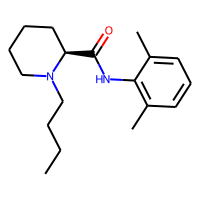
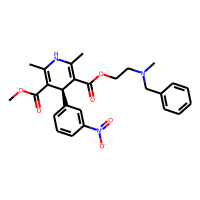
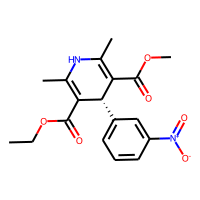
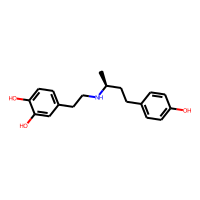
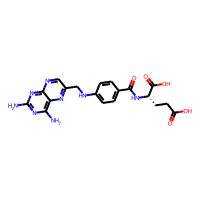
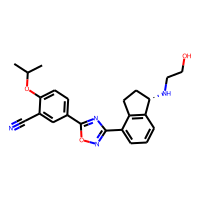
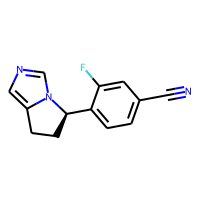
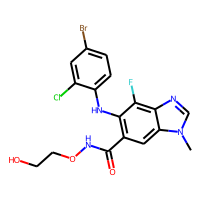
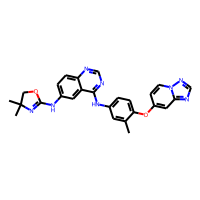
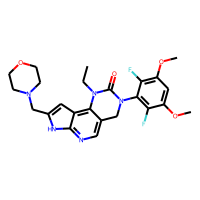

In [63]:
data

In [64]:
data.columns

Index(['SMILES', 'mol', 'atom_fp', 'atom_tanimoto', 'mac_fp', 'mac_tanimoto',
       'morg_fp', 'morg_tanimoto', 'palen_fp', 'palen_tanimoto', 'toptor_fp',
       'toptor_tanimoto'],
      dtype='object')

In [65]:
# Drop the non-transformed columns
data = data.drop(columns = ['SMILES', 'mol'])

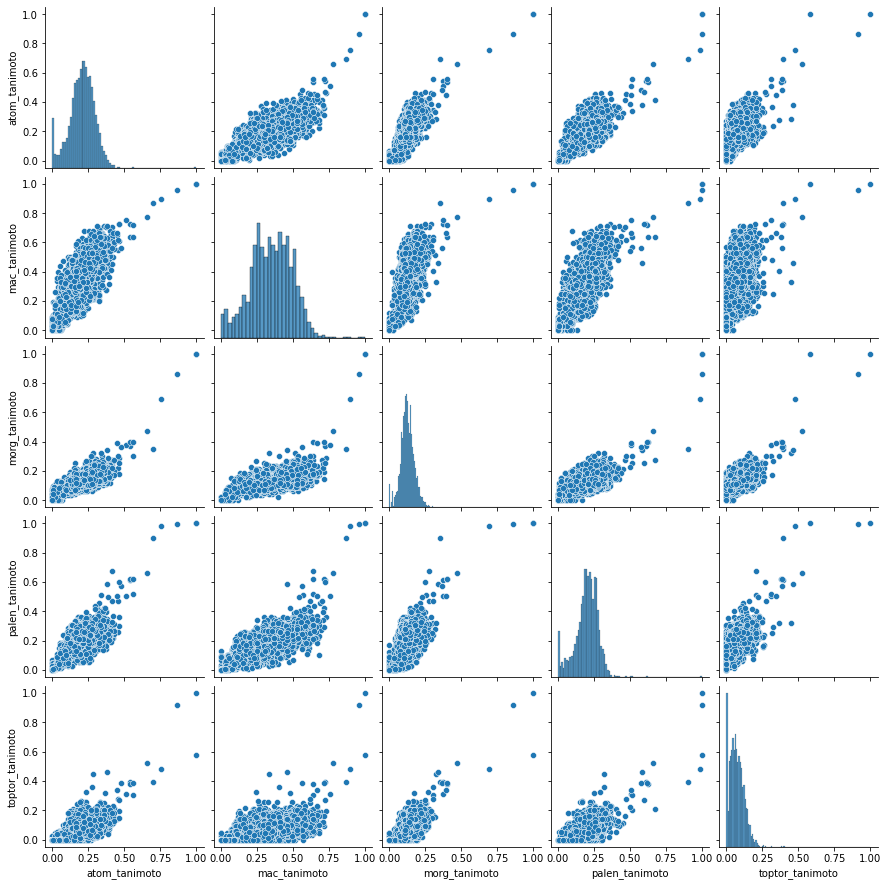

In [66]:
sns.pairplot(data)

In [67]:
data

,atom_fp,atom_tanimoto,mac_fp,mac_tanimoto,morg_fp,morg_tanimoto,palen_fp,palen_tanimoto,toptor_fp,toptor_tanimoto
0,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",1.000000,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
1,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.274924,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.479452,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.151163,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...",0.260263,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",0.119048
2,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.228188,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.352113,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.194444,"[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, ...",0.253635,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.109589
3,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.271429,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.400000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.102941,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",0.191549,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.050847
4,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.233677,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.420290,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090909,"[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, ...",0.276248,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.093333
...,...,...,...,...,...,...,...,...,...,...
4634,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...",0.262976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.423077,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.141304,"[1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...",0.237251,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.104651
4635,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.183857,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.305085,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.109589,"[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.210938,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.042857
4639,"[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.220000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.412500,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",0.136364,"[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, ...",0.258746,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.118421
4640,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.161905,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.407895,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.117021,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.254902,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.082474


In [68]:
x= data.iloc[:, [1,3,5,7,9]].values 

In [69]:
x

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.27492447, 0.47945205, 0.15116279, 0.26026336, 0.11904762],
       [0.22818792, 0.35211268, 0.19444444, 0.25363489, 0.10958904],
       ...,
       [0.22      , 0.4125    , 0.13636364, 0.25874636, 0.11842105],
       [0.16190476, 0.40789474, 0.11702128, 0.25490196, 0.08247423],
       [0.27355623, 0.52564103, 0.10752688, 0.27724665, 0.06862745]])

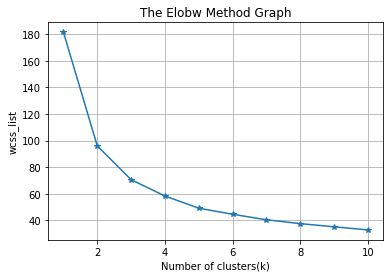

In [70]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list, marker='*')  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')
plt.grid()
plt.show() 


In [71]:
wcss_list

[181.41186238578825,
 95.95399959212857,
 70.57192712312315,
 58.31239266658911,
 49.13636232487824,
 44.58752535494206,
 40.43952365074448,
 37.537510051726635,
 35.152144574477504,
 32.80304598082945]

In [72]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

In [73]:
y_predict

array([3, 1, 4, ..., 4, 4, 1])

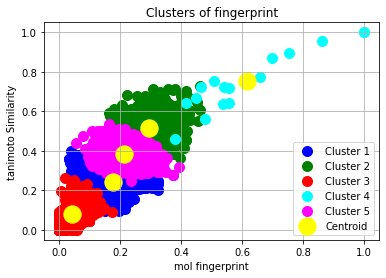

In [74]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of fingerprint')  
plt.xlabel('mol fingerprint')  
plt.ylabel('tanimoto Similarity')  
plt.legend()  
plt.grid() 
plt.show()

In [75]:
#inertia on the fitted data
kmeans.inertia_

49.13636232487824

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=1).fit(x)
labels = kmeans.labels_
predictions = kmeans.fit_predict(x)
score_kemans_s = silhouette_score(x, kmeans.labels_)
score_kemans_c = calinski_harabasz_score(x, kmeans.labels_)
score_kemans_d = davies_bouldin_score(x, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.2932
Calinski Harabasz Score: 2931.5175
Davies Bouldin Score: 0.9869


In [77]:
x

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.27492447, 0.47945205, 0.15116279, 0.26026336, 0.11904762],
       [0.22818792, 0.35211268, 0.19444444, 0.25363489, 0.10958904],
       ...,
       [0.22      , 0.4125    , 0.13636364, 0.25874636, 0.11842105],
       [0.16190476, 0.40789474, 0.11702128, 0.25490196, 0.08247423],
       [0.27355623, 0.52564103, 0.10752688, 0.27724665, 0.06862745]])

0.06173997575953851


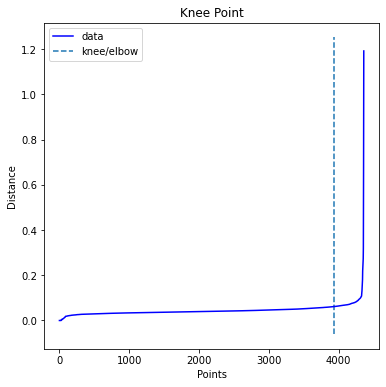

In [78]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(x)
distances, indices = neighbors.kneighbors(x)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

db = DBSCAN(eps=0.06173997575953851, min_samples=18)
labels= db.fit_predict(x)
score_dbsacn_s = silhouette_score(x, labels, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(x,labels )
score_dbsacn_d = davies_bouldin_score(x, labels)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)



Silhouette Score: 0.3489
Calinski Harabasz Score: 244.8533
Davies Bouldin Score: 1.9287


In [82]:
x= data.iloc[:, [1,3,5,7,9]].values

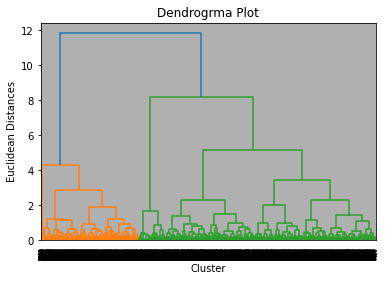

In [83]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Cluster")  
plt.grid()
plt.show()

In [84]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)

In [85]:
y_pred

array([4, 1, 3, ..., 3, 3, 1], dtype=int64)

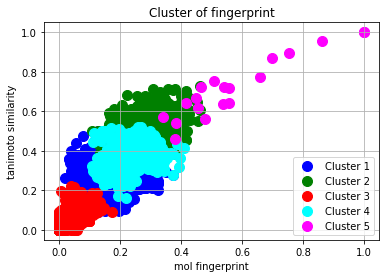

In [86]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Cluster of fingerprint')  
plt.xlabel('mol fingerprint')  
plt.ylabel('tanimoto similarity')  
plt.legend()  
plt.grid()
plt.show()

In [87]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
y=hc.fit(x)
y_pred= hc.fit_predict(x)
# retrieve unique clusters
clusters = unique(y)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(x, y.labels_)
score_AGclustering_c = calinski_harabasz_score(x, y.labels_)
score_AGclustering_d = davies_bouldin_score(x, y_pred)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.2310
Calinski Harabasz Score: 2495.0060
Davies Bouldin Score: 1.1046


In [88]:
data = data.drop(columns = ['atom_fp', 'mac_fp','morg_fp','palen_fp','toptor_fp'])

In [89]:
data

,atom_tanimoto,mac_tanimoto,morg_tanimoto,palen_tanimoto,toptor_tanimoto
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.274924,0.479452,0.151163,0.260263,0.119048
2,0.228188,0.352113,0.194444,0.253635,0.109589
3,0.271429,0.400000,0.102941,0.191549,0.050847
4,0.233677,0.420290,0.090909,0.276248,0.093333
...,...,...,...,...,...
4634,0.262976,0.423077,0.141304,0.237251,0.104651
4635,0.183857,0.305085,0.109589,0.210938,0.042857
4639,0.220000,0.412500,0.136364,0.258746,0.118421
4640,0.161905,0.407895,0.117021,0.254902,0.082474


In [90]:
data.columns

Index(['atom_tanimoto', 'mac_tanimoto', 'morg_tanimoto', 'palen_tanimoto',
       'toptor_tanimoto'],
      dtype='object')

In [91]:
import random
import operator
import math

In [92]:
columns = list(data.columns)
features = columns[:len(columns)-1]
cluster_labels = list(data[columns[-1]])
data = data[features]

In [93]:
# Number of Attributes
num_attr = len(data.columns) - 1

# Number of Clusters to make
k = 5

# Maximum number of iterations
MAX_ITER = 100

# Number of data points
n = len(data)

# Fuzzy parameter
m = 2.00

In [94]:
### initializing the membership matrix with random values
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat


In [95]:
membership_mat = initializeMembershipMatrix()

In [96]:
### calculating the cluster center, is done in every iteration

def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = list()
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(data.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [97]:
#cluster_centers = calculateClusterCenter(membership_mat)
calculateClusterCenter(membership_mat)

[[0.20729924752733073,
  0.3499937271479699,
  0.12766794871162268,
  0.20283009281419345],
 [0.20609786583657802,
  0.3462520978101996,
  0.1274963974074167,
  0.20177194947890234],
 [0.20774110529928316,
  0.3502939441720725,
  0.1265014728175796,
  0.2033849894502251],
 [0.209995417040391,
  0.3498867129323292,
  0.12905761657768536,
  0.20335975406512846],
 [0.2078820584696932,
  0.35085938061366717,
  0.1275180099016409,
  0.20244394676684352]]

In [98]:
### updating the membership values using the cluster centers

def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(data.iloc[i])
        distances = [np.linalg.norm(list(map(operator.sub, x, cluster_centers[j]))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat


In [99]:
def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels


In [100]:
### the final fcm function, 

def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    
    print(membership_mat)
    return cluster_labels, cluster_centers

In [101]:
### calling the main function and storing the final results in labels, centers

print("printing the final membership matrix")

labels, centers = fuzzyCMeansClustering()

print("printing cluster centers")
print(centers)


printing the final membership matrix
[[0.20009612485769832, 0.2577144391881488, 0.13693180712116573, 0.1803734029493478, 0.2248842258836393], [0.057382631584401086, 0.3964816265875254, 0.006007375589122571, 0.021098776909000992, 0.51902958932995], [0.43470590752181637, 0.09161562759597426, 0.019719669127615906, 0.11685297167039607, 0.33710582408419737], [0.30649096953120136, 0.10487665223252554, 0.01622929717453785, 0.08112895805480463, 0.4912741230069306], [0.18168667384890802, 0.10140245712220203, 0.011406358036167274, 0.04939190570855151, 0.6561126052841711], [0.1429228546421227, 0.02661457943965761, 0.08992456109624687, 0.6879270383564823, 0.05261096646549057], [0.1619052650295385, 0.03476401687977322, 0.1283492318562549, 0.609309816066498, 0.06567167016793526], [0.4597534539571891, 0.07764519818640686, 0.045458217862470805, 0.2025233990082266, 0.2146197309857066], [0.2119821256794613, 0.05054917003280397, 0.2182205964695328, 0.4234853555497416, 0.09576275226846047], [0.48086710816